# Simulate the Model

In [1]:
import numpy as np
from scipy.integrate import solve_ivp

# Pendulum + cart parameters
M = 1.0     # cart mass
m = 0.1     # pendulum mass
l = 0.5     # pendulum length
g = 9.81

# Input (PRBS)
def prbs(n, umin=-10, umax=10, switch_prob=0.02):
    u = np.zeros(n)
    u[0] = np.random.choice([umin, umax])
    for k in range(1, n):
        if np.random.rand() < switch_prob:
            u[k] = umax if u[k-1] == umin else umin
        else:
            u[k] = u[k-1]
    return u

# Nonlinear dynamics
def pendulum_dynamics(t, s, u_func):
    x, xdot, th, thdot = s
    u = u_func(t)
    
    denom = M + m*(1 - np.cos(th)**2)
    xdd = (u + m*l*thdot**2*np.sin(th) - m*g*np.sin(th)*np.cos(th)) / denom
    thdd = (-u*np.cos(th) - m*l*thdot**2*np.sin(th)*np.cos(th) + (M+m)*g*np.sin(th)) / (l*denom)
    
    return [xdot, xdd, thdot, thdd]

# Simulation settings
Ts = 0.01
T_final = 20
t_eval = np.arange(0, T_final, Ts)

# Generate PRBS input
u_vals = prbs(len(t_eval))
u_func = lambda t: np.interp(t, t_eval, u_vals)

# Solve ODE
sol = solve_ivp(lambda t, s: pendulum_dynamics(t, s, u_func),
                [0, T_final],
                [0, 0, 0.05, 0], # initial states
                t_eval=t_eval,
                rtol=1e-8, atol=1e-8)

x = sol.y[0]
xdot = sol.y[1]
theta = sol.y[2]
thetadot = sol.y[3]


# EDA

=== Descriptive Statistics ===


,count,mean,std,min,25%,50%,75%,max
t,2000.0,9.995000,5.774946,0.000000,4.997500,9.995000,14.992500,19.990000
x,2000.0,-91.095837,81.790071,-254.385044,-159.629554,-53.829319,-22.901976,0.000000
theta,2000.0,-9.173025,12.131257,-24.704307,-21.146030,-10.858867,2.643221,11.345239
xdot,2000.0,-12.723556,8.256558,-27.420240,-20.450853,-12.463029,-5.167556,0.751323
thetadot,2000.0,-1.153750,6.399559,-12.441168,-6.605269,-1.749281,4.359418,12.831784
u,2000.0,-0.960000,9.956303,-10.000000,-10.000000,-10.000000,10.000000,10.000000


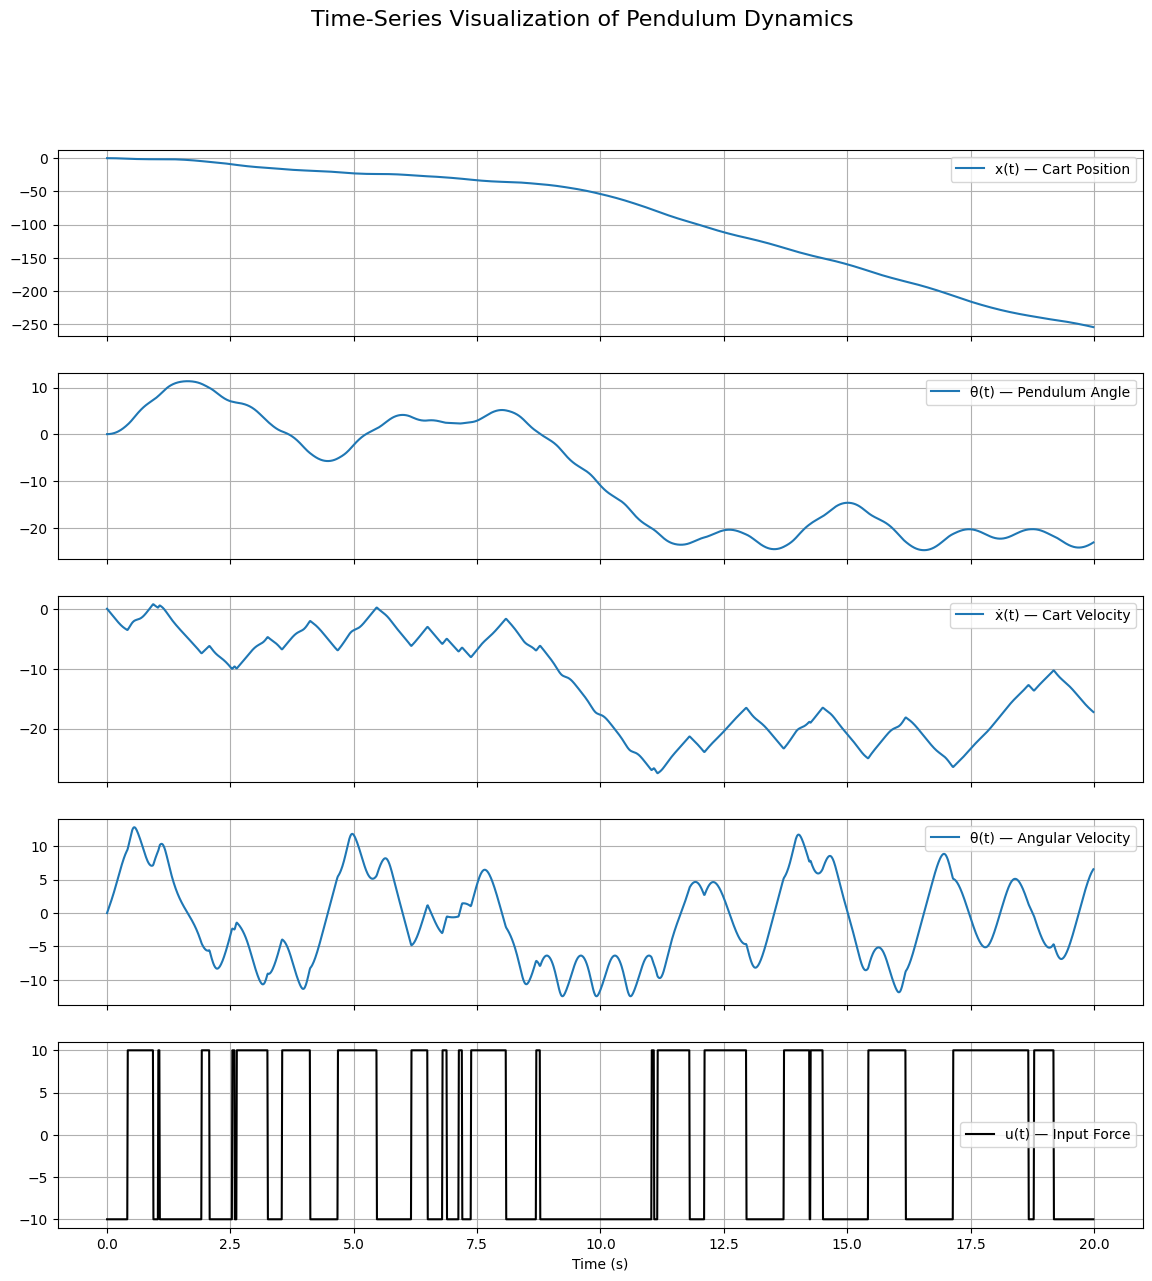

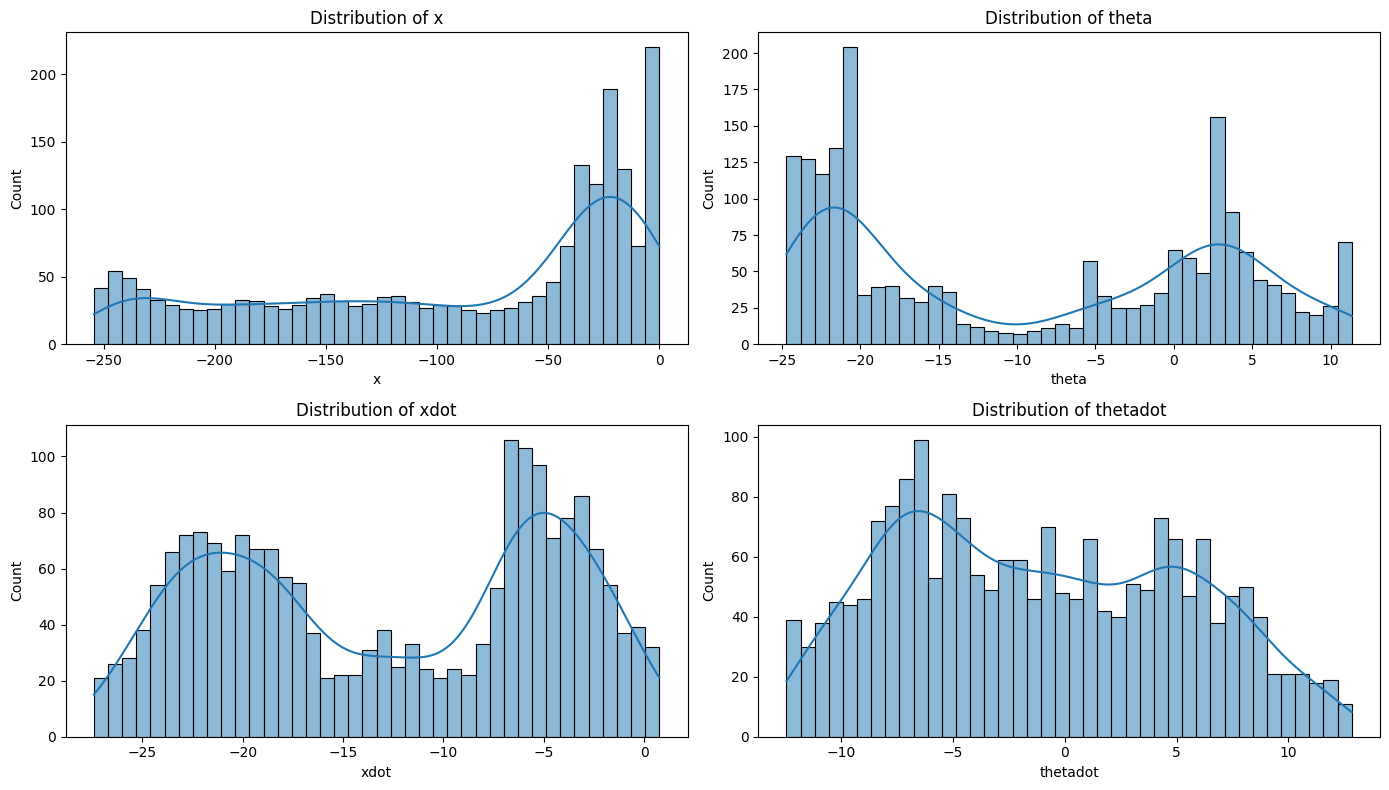

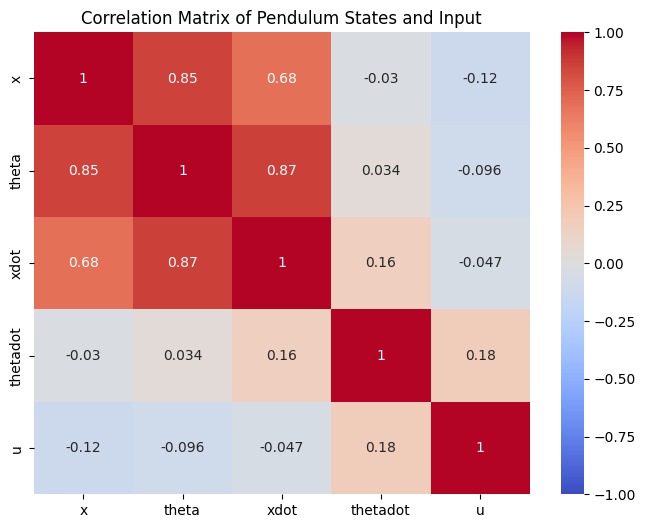

In [ ]:
# ============================================================
#  Exploratory Data Analysis (EDA) for Pendulum Simulation
# ============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.DataFrame({
    "t": t_eval,
    "x": x,
    "theta": theta,
    "xdot": xdot,
    "thetadot": thetadot,
    "u": u_vals,
})

#Descriptive statistics
print("=== Descriptive Statistics ===")
display(data.describe().T)

# Time-series visualization-
fig, axs = plt.subplots(5, 1, figsize=(14, 14), sharex=True)

axs[0].plot(data["t"], data["x"], label="x(t) — Cart Position")
axs[1].plot(data["t"], data["theta"], label="θ(t) — Pendulum Angle")
axs[2].plot(data["t"], data["xdot"], label="ẋ(t) — Cart Velocity")
axs[3].plot(data["t"], data["thetadot"], label="θ̇(t) — Angular Velocity")
axs[4].plot(data["t"], data["u"], color="black", label="u(t) — Input Force")

for ax in axs:
    ax.grid(True)
    ax.legend()

axs[-1].set_xlabel("Time (s)")
plt.suptitle("Time-Series Visualization of Pendulum Dynamics", fontsize=16)
plt.show()

# Distribution plots
plt.figure(figsize=(14, 8))
variables = ["x", "theta", "xdot", "thetadot"]

for i, col in enumerate(variables):
    plt.subplot(2, 2, i+1)
    sns.histplot(data[col], kde=True, bins=40)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()


# Correlation matrix
corr_vars = ["x", "theta", "xdot", "thetadot", "u"]
corr_matrix = data[corr_vars].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix of Pendulum States and Input")
plt.show()


# Stationary

Raw data shape: (2000, 6)

ADF test for x:
  ADF statistic = 0.849
  p-value       = 0.992


(np.float64(0.8489918421961619),
 np.float64(0.9923872097765922),
 6,
 1993,
 {'1%': np.float64(-3.43363537003345),
  '5%': np.float64(-2.862991296796771),
  '10%': np.float64(-2.5675426088474738)},
 np.float64(-28709.891061534418))


KPSS test for x:
  KPSS statistic = 6.623
  p-value        = 0.01


/var/folders/xf/t_vc6zv12hn96zwd_hr5y36c0000gn/T/ipykernel_1611/2722842304.py:39: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  res = kpss(series, regression="c", nlags="auto")


(np.float64(6.623307262177758),
 np.float64(0.01),
 28,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})


ADF test for theta:
  ADF statistic = -1.251
  p-value       = 0.651


(np.float64(-1.2509893600873145),
 np.float64(0.6512861122767136),
 8,
 1991,
 {'1%': np.float64(-3.4336386745240652),
  '5%': np.float64(-2.8629927557359443),
  '10%': np.float64(-2.5675433856598793)},
 np.float64(-27233.740282477414))


KPSS test for theta:
  KPSS statistic = 5.898
  p-value        = 0.01


/var/folders/xf/t_vc6zv12hn96zwd_hr5y36c0000gn/T/ipykernel_1611/2722842304.py:39: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  res = kpss(series, regression="c", nlags="auto")


(np.float64(5.897802774240617),
 np.float64(0.01),
 28,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})


ADF test for xdot:
  ADF statistic = -1.659
  p-value       = 0.453


(np.float64(-1.6586336084713413),
 np.float64(0.45254172413794735),
 26,
 1973,
 {'1%': np.float64(-3.4336687168076714),
  '5%': np.float64(-2.863006019389988),
  '10%': np.float64(-2.567550447906854)},
 np.float64(-11288.3380796534))


KPSS test for xdot:
  KPSS statistic = 4.753
  p-value        = 0.01


/var/folders/xf/t_vc6zv12hn96zwd_hr5y36c0000gn/T/ipykernel_1611/2722842304.py:39: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  res = kpss(series, regression="c", nlags="auto")


(np.float64(4.752579836344369),
 np.float64(0.01),
 28,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})


ADF test for thetadot:
  ADF statistic = -3.795
  p-value       = 0.00296


(np.float64(-3.7949998261947675),
 np.float64(0.0029588896194353296),
 23,
 1976,
 {'1%': np.float64(-3.4336636717018405),
  '5%': np.float64(-2.8630037919874423),
  '10%': np.float64(-2.567549261922421)},
 np.float64(-9769.36378104326))


KPSS test for thetadot:
  KPSS statistic = 0.237
  p-value        = 0.1


/var/folders/xf/t_vc6zv12hn96zwd_hr5y36c0000gn/T/ipykernel_1611/2722842304.py:39: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  res = kpss(series, regression="c", nlags="auto")


(np.float64(0.2373861341158125),
 np.float64(0.1),
 28,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})



=== After detrending / differencing ===

ADF test for dx:
  ADF statistic = -1.752
  p-value       = 0.404


(np.float64(-1.7522464333971757),
 np.float64(0.4044142328048389),
 5,
 1994,
 {'1%': np.float64(-3.4336337202771823),
  '5%': np.float64(-2.8629905684254977),
  '10%': np.float64(-2.5675422210261676)},
 np.float64(-28711.170855235297))


KPSS test for dx:
  KPSS statistic = 4.747
  p-value        = 0.01


/var/folders/xf/t_vc6zv12hn96zwd_hr5y36c0000gn/T/ipykernel_1611/2722842304.py:39: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  res = kpss(series, regression="c", nlags="auto")


(np.float64(4.746751843872422),
 np.float64(0.01),
 28,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})


ADF test for dtheta:
  ADF statistic = -4.609
  p-value       = 0.000124


(np.float64(-4.609025815211971),
 np.float64(0.0001243110655292268),
 7,
 1992,
 {'1%': np.float64(-3.4336370214482437),
  '5%': np.float64(-2.862992025899885),
  '10%': np.float64(-2.5675429970585153)},
 np.float64(-27233.82492276966))


KPSS test for dtheta:
  KPSS statistic = 0.237
  p-value        = 0.1


/var/folders/xf/t_vc6zv12hn96zwd_hr5y36c0000gn/T/ipykernel_1611/2722842304.py:39: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  res = kpss(series, regression="c", nlags="auto")


(np.float64(0.23720535497473577),
 np.float64(0.1),
 28,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})


ADF test for xdot:
  ADF statistic = -1.659
  p-value       = 0.453


(np.float64(-1.6586336084713413),
 np.float64(0.45254172413794735),
 26,
 1973,
 {'1%': np.float64(-3.4336687168076714),
  '5%': np.float64(-2.863006019389988),
  '10%': np.float64(-2.567550447906854)},
 np.float64(-11288.3380796534))


KPSS test for xdot:
  KPSS statistic = 4.753
  p-value        = 0.01


/var/folders/xf/t_vc6zv12hn96zwd_hr5y36c0000gn/T/ipykernel_1611/2722842304.py:39: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  res = kpss(series, regression="c", nlags="auto")


(np.float64(4.752579836344369),
 np.float64(0.01),
 28,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})


ADF test for thetadot:
  ADF statistic = -3.795
  p-value       = 0.00296


(np.float64(-3.7949998261947675),
 np.float64(0.0029588896194353296),
 23,
 1976,
 {'1%': np.float64(-3.4336636717018405),
  '5%': np.float64(-2.8630037919874423),
  '10%': np.float64(-2.567549261922421)},
 np.float64(-9769.36378104326))


KPSS test for thetadot:
  KPSS statistic = 0.237
  p-value        = 0.1


/var/folders/xf/t_vc6zv12hn96zwd_hr5y36c0000gn/T/ipykernel_1611/2722842304.py:39: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  res = kpss(series, regression="c", nlags="auto")


(np.float64(0.2373861341158125),
 np.float64(0.1),
 28,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})


Scaler means: [ 8.71393880e-03  7.12685944e-03 -1.27235559e+01 -1.15374974e+00
 -9.60000000e-01]
Scaler stds : [0.08251709 0.06396533 8.25449359 6.39795912 9.95381334]


Text(0.5, 1.0, 'Raw x(t)')

Text(0.5, 1.0, 'Processed dx(t) (detrend + diff)')

Text(0.5, 1.0, 'Raw theta(t)')

Text(0.5, 1.0, 'Processed dtheta(t) (detrend + diff)')

Text(0.5, 0, 'Time (s)')

Text(0.5, 0, 'Time (s)')

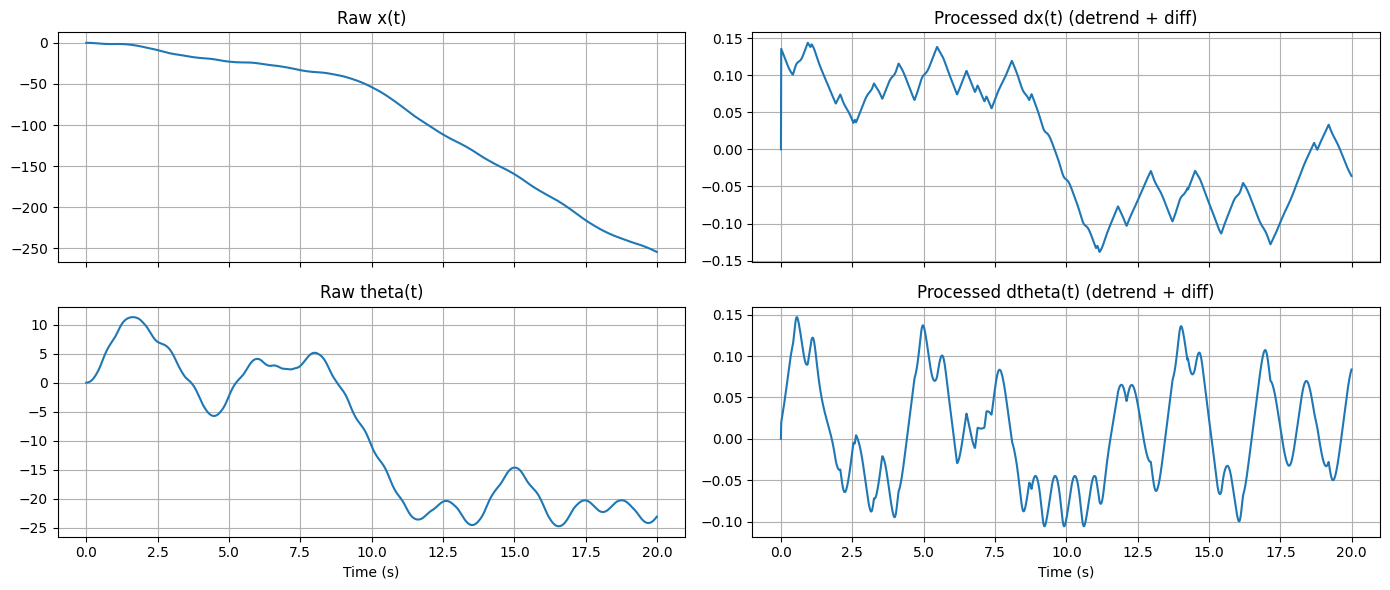

<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'Scaled Processed Features')

Text(0.5, 0, 'Time (s)')

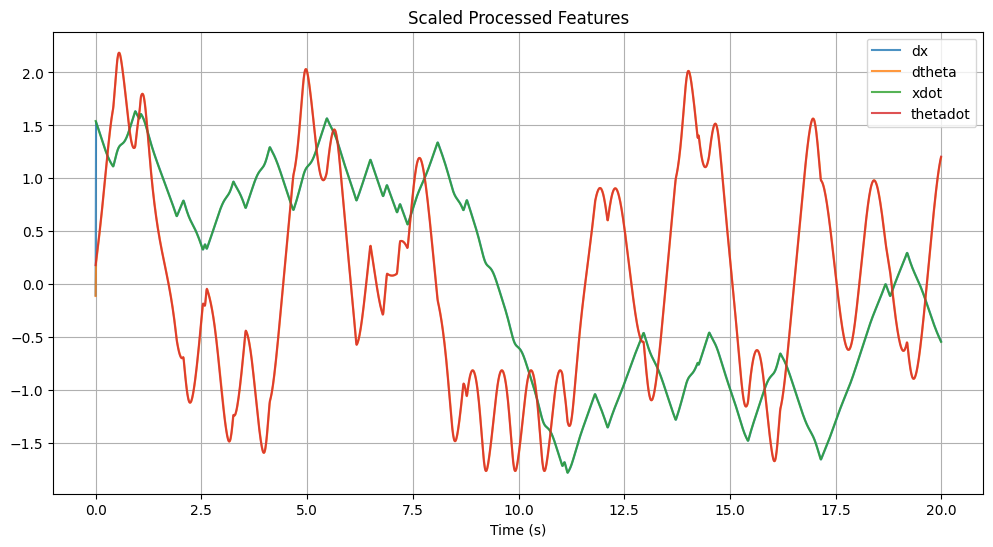


Preprocessing complete. Use `scaled` DataFrame for model identification.


In [ ]:
# Stationarity & Preprocessing 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.signal import detrend
from statsmodels.tsa.stattools import adfuller, kpss
from sklearn.preprocessing import StandardScaler

raw = pd.DataFrame({
    "t": t_eval,
    "x": x,
    "theta": theta,
    "xdot": xdot,
    "thetadot": thetadot,
    "u": u_vals,
})

print("Raw data shape:", raw.shape)


# Helper: ADF and KPSS tests

def run_adf(series, name):
    res = adfuller(series, autolag="AIC")
    print(f"\nADF test for {name}:")
    print(f"  ADF statistic = {res[0]:.3f}")
    print(f"  p-value       = {res[1]:.3g}")
    return res

def run_kpss_test(series, name):
    # use regression='c' (constant) by default
    res = kpss(series, regression="c", nlags="auto")
    print(f"\nKPSS test for {name}:")
    print(f"  KPSS statistic = {res[0]:.3f}")
    print(f"  p-value        = {res[1]:.3g}")
    return res

# Run tests on original series (except input u)
for col in ["x", "theta", "xdot", "thetadot"]:
    run_adf(raw[col], col)
    run_kpss_test(raw[col], col)


# 2) Detrending / Differencing
# Detrend x and theta (strong drift)
x_detr = detrend(raw["x"].values, type="linear")
theta_detr = detrend(raw["theta"].values, type="linear")

# First difference (optional – you can comment out if you only want detrend)
dx = np.diff(x_detr, prepend=x_detr[0])
dtheta = np.diff(theta_detr, prepend=theta_detr[0])

# Velocities: usually okay, just keep as is (no diff)
xdot_proc = raw["xdot"].values
thetadot_proc = raw["thetadot"].values

preproc = pd.DataFrame({
    "t": raw["t"],
    "dx": dx,
    "dtheta": dtheta,
    "xdot": xdot_proc,
    "thetadot": thetadot_proc,
    "u": raw["u"],
})

# Re-run stationarity tests on processed signals

print("\n\n=== After detrending / differencing ===")
for col in ["dx", "dtheta", "xdot", "thetadot"]:
    run_adf(preproc[col], col)
    run_kpss_test(preproc[col], col)


features_to_scale = ["dx", "dtheta", "xdot", "thetadot", "u"]

scaler = StandardScaler()
scaled_vals = scaler.fit_transform(preproc[features_to_scale])

scaled = preproc.copy()
scaled[features_to_scale] = scaled_vals

print("\nScaler means:", scaler.mean_)
print("Scaler stds :", np.sqrt(scaler.var_))

-
fig, axs = plt.subplots(2, 2, figsize=(14, 6), sharex=True)

# x
axs[0, 0].plot(raw["t"], raw["x"])
axs[0, 0].set_title("Raw x(t)")
axs[0, 0].grid(True)

axs[0, 1].plot(preproc["t"], preproc["dx"])
axs[0, 1].set_title("Processed dx(t) (detrend + diff)")
axs[0, 1].grid(True)

# theta
axs[1, 0].plot(raw["t"], raw["theta"])
axs[1, 0].set_title("Raw theta(t)")
axs[1, 0].grid(True)

axs[1, 1].plot(preproc["t"], preproc["dtheta"])
axs[1, 1].set_title("Processed dtheta(t) (detrend + diff)")
axs[1, 1].grid(True)

for ax in axs[-1, :]:
    ax.set_xlabel("Time (s)")

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
for col in ["dx", "dtheta", "xdot", "thetadot"]:
    plt.plot(scaled["t"], scaled[col], label=col, alpha=0.8)
plt.title("Scaled Processed Features")
plt.xlabel("Time (s)")
plt.grid(True)
plt.legend()
plt.show()

print("\nPreprocessing complete. Use `scaled` DataFrame for model identification.")


In [16]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Disable auto-scroll for outputs
from IPython.display import display, Javascript
display(Javascript('IPython.OutputArea.auto_scroll_threshold = 9999;'))

<IPython.core.display.Javascript object>

# ARX

Number of samples: 2000
=== ARX order scan (sorted by AIC) ===


,na,nb,AIC,BIC
0,4,3,-22246.212475,-22207.020172
1,4,2,-22245.737010,-22212.143607
2,4,4,-22244.946423,-22200.155220
3,3,4,-22233.569889,-22194.377586
4,4,1,-22194.605726,-22166.611224
5,3,2,-21802.076575,-21774.079568
6,3,3,-21801.401966,-21767.805558
7,3,1,-21756.231947,-21733.834342
8,2,3,-21610.855477,-21582.858470
9,2,4,-21599.638998,-21566.045595



Best ARX model by AIC:
  na = 4, nb = 3, nk = 1
  AIC = -22246.21, BIC = -22207.02

Estimated coefficients:
  a (output lags):
    a1 = -2.5285
    a2 = 2.1158
    a3 = -0.6289
    a4 = 0.0421
  b (input lags):
    b1 = 0.0022
    b2 = -0.0027
    b3 = 0.0005


<Figure size 1200x400 with 0 Axes>

Text(0.5, 0, 'Time (s)')

Text(0, 0.5, 'Scaled dtheta')

Text(0.5, 1.0, 'ARX(4,3) fit to dtheta')

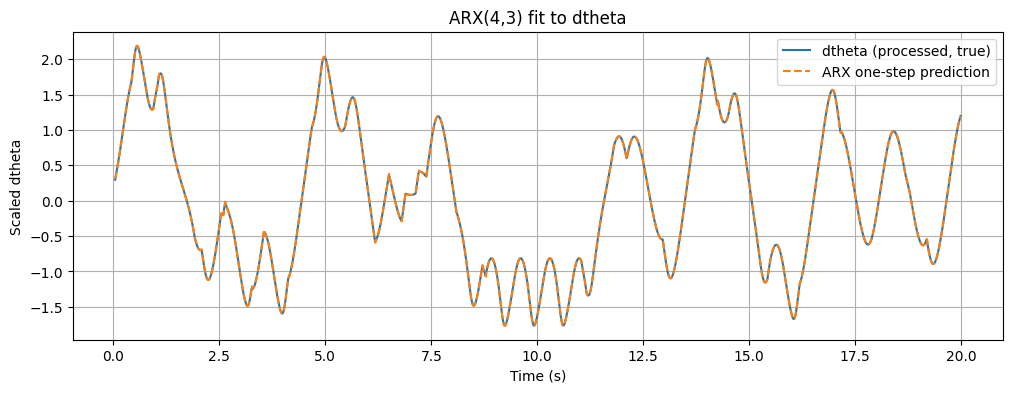

<Figure size 1200x300 with 0 Axes>

Text(0.5, 0, 'Time (s)')

Text(0, 0.5, 'Residual')

Text(0.5, 1.0, 'ARX residuals e(k) = y(k) - y_hat(k)')

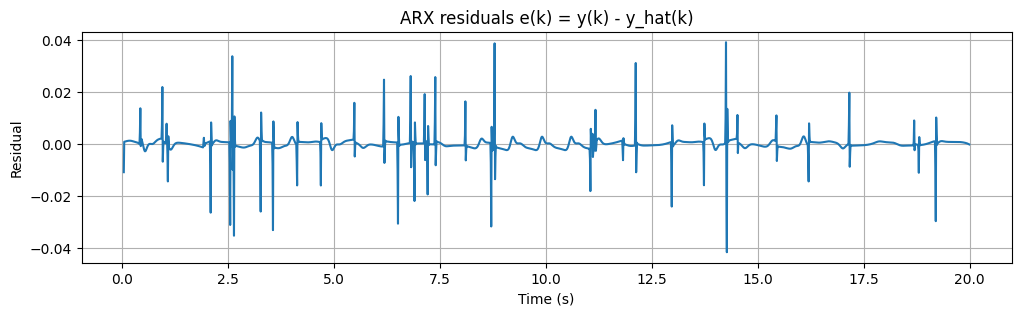

<Figure size 600x400 with 0 Axes>

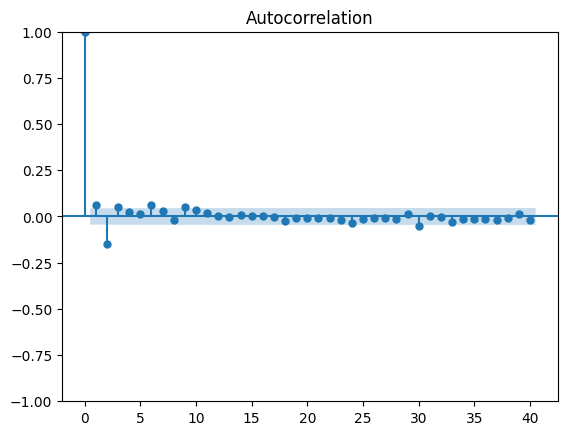

Text(0.5, 1.0, 'Residual ACF (ARX model)')

<Figure size 600x400 with 0 Axes>

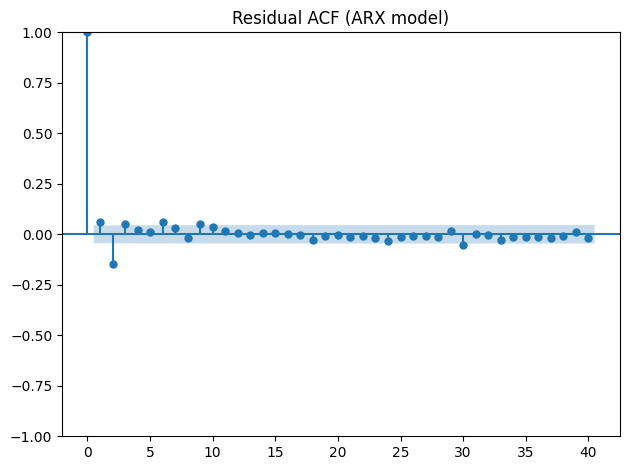

In [20]:
# ==========================================
# ARX identification for pendulum (y = dtheta, u = force)
# ==========================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# ------------------------------------------
# 0) Choose output and input from preprocessed data
# ------------------------------------------
# Use processed & scaled series
y = scaled["dtheta"].values   # output
u = scaled["u"].values        # input
t = scaled["t"].values

N = len(y)
print("Number of samples:", N)

# ------------------------------------------
# 1) Helper: build ARX regression matrix
#    y(k) + a1*y(k-1)+... = b1*u(k-1)+... + e(k)
# ------------------------------------------
def build_arx_matrices(y, u, na, nb, nk=1):
    """
    Build regression matrix Phi and target vector y_reg for an ARX(na, nb, nk) model.
    y(k) = -a1*y(k-1) - ... - an*y(k-na) + b1*u(k-nk) + ... + bnb*u(k-nk-nb+1) + e(k)
    
    Returns:
        Phi : (N_eff x (na+nb)) regressor matrix
        y_reg : (N_eff,) target vector
    """
    N = len(y)
    k0 = max(na, nb + nk - 1)
    rows = N - k0
    Phi = np.zeros((rows, na + nb))
    y_reg = np.zeros(rows)

    for i, k in enumerate(range(k0, N)):
        # output lags
        for j in range(1, na + 1):
            Phi[i, j-1] = -y[k - j]          # minus sign -> move to RHS
        # input lags
        for j in range(1, nb + 1):
            Phi[i, na + j - 1] = u[k - nk - j + 1]
        y_reg[i] = y[k]

    return Phi, y_reg, k0

# ------------------------------------------
# 2) Helper: fit ARX and compute AIC/BIC
# ------------------------------------------
def fit_arx(y, u, na, nb, nk=1):
    Phi, y_reg, k0 = build_arx_matrices(y, u, na, nb, nk)
    # least-squares estimate
    theta_hat, residuals, rank, s = np.linalg.lstsq(Phi, y_reg, rcond=None)
    y_hat = Phi @ theta_hat

    # residuals
    eps = y_reg - y_hat
    sigma2 = np.mean(eps**2)
    n_params = na + nb
    n_eff = len(y_reg)

    # AIC/BIC (Gaussian assumption)
    aic = n_eff * np.log(sigma2) + 2 * n_params
    bic = n_eff * np.log(sigma2) + np.log(n_eff) * n_params

    return {
        "na": na,
        "nb": nb,
        "nk": nk,
        "theta": theta_hat,
        "y_reg": y_reg,
        "y_hat": y_hat,
        "eps": eps,
        "aic": aic,
        "bic": bic,
        "k0": k0,
    }

# ------------------------------------------
# 3) Scan a small grid of orders and choose best by AIC
# ------------------------------------------
results = []
for na in range(1, 5):       # AR order from 1 to 4
    for nb in range(1, 5):   # input order from 1 to 4
        res = fit_arx(y, u, na, nb, nk=1)
        results.append(res)

# Put into a DataFrame for inspection
order_table = pd.DataFrame([
    {"na": r["na"], "nb": r["nb"], "AIC": r["aic"], "BIC": r["bic"]}
    for r in results
]).sort_values("AIC").reset_index(drop=True)

print("=== ARX order scan (sorted by AIC) ===")
display(order_table)

# Best model by AIC
best = min(results, key=lambda r: r["aic"])
print("\nBest ARX model by AIC:")
print(f"  na = {best['na']}, nb = {best['nb']}, nk = {best['nk']}")
print(f"  AIC = {best['aic']:.2f}, BIC = {best['bic']:.2f}")

# ------------------------------------------
# 4) Inspect coefficients
# ------------------------------------------
na_best, nb_best = best["na"], best["nb"]
theta_hat = best["theta"]

print("\nEstimated coefficients:")
print("  a (output lags):")
for i in range(na_best):
    print(f"    a{i+1} = {theta_hat[i]:.4f}")

print("  b (input lags):")
for j in range(nb_best):
    print(f"    b{j+1} = {theta_hat[na_best + j]:.4f}")

# ------------------------------------------
# 5) Plot fit vs. data (on effective range)
# ------------------------------------------
k0 = best["k0"]
t_eff = t[k0:]
y_eff = best["y_reg"]
y_hat = best["y_hat"]
eps = best["eps"]

plt.figure(figsize=(12, 4))
plt.plot(t_eff, y_eff, label="dtheta (processed, true)")
plt.plot(t_eff, y_hat, label="ARX one-step prediction", linestyle="--")
plt.xlabel("Time (s)")
plt.ylabel("Scaled dtheta")
plt.title(f"ARX({na_best},{nb_best}) fit to dtheta")
plt.grid(True)
plt.legend()
plt.show()

# ------------------------------------------
# 6) Residual analysis
# ------------------------------------------
plt.figure(figsize=(12, 3))
plt.plot(t_eff, eps)
plt.xlabel("Time (s)")
plt.ylabel("Residual")
plt.title("ARX residuals e(k) = y(k) - y_hat(k)")
plt.grid(True)
plt.show()

plt.figure(figsize=(6, 4))
plot_acf(eps, lags=40)
plt.title("Residual ACF (ARX model)")
plt.tight_layout()
plt.show()



Train samples = 1400, Test samples = 600
k0 (max lag index) for training = 4

ARX direct one-step ahead (test)
  MAE  = 0.0013
  RMSE = 0.0034
  MAPE = 0.36 %


(0.0012933134017162713,
 np.float64(0.003437736627767039),
 np.float64(0.35931180772150206))


ARX recursive multi-step ahead (test)
  MAE  = 0.6844
  RMSE = 0.8176
  MAPE = 122.84 %


(0.6843771929017871,
 np.float64(0.8176488316849043),
 np.float64(122.84364120808668))

<Figure size 1200x400 with 0 Axes>

Text(0.5, 0, 'Time (s)')

Text(0, 0.5, 'Scaled dtheta')

Text(0.5, 1.0, 'ARX forecasting: direct vs recursive (test set)')

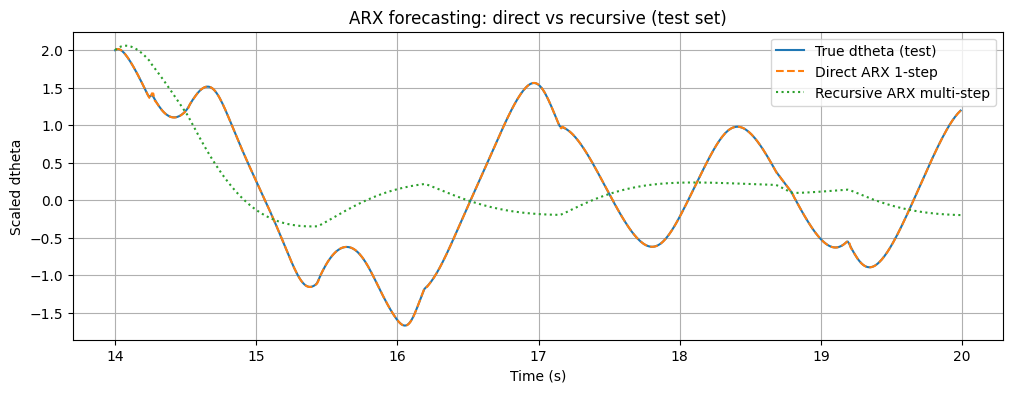

In [26]:
# ==========================================
# 7) ARX Forecasting: direct vs recursive
#    + MAE, MAPE, RMSE on test set
# ==========================================
from sklearn.metrics import mean_absolute_error, mean_squared_error

# ----- Train / test split (time-ordered) -----
train_frac = 0.7
N = len(y)
N_train = int(train_frac * N)

y_train, y_test = y[:N_train], y[N_train:]
u_train, u_test = u[:N_train], u[N_train:]
t_train, t_test = t[:N_train], t[N_train:]

print(f"\nTrain samples = {N_train}, Test samples = {N - N_train}")

# ----- Fit ARX(na_best, nb_best) on training data only -----
res_train = fit_arx(y_train, u_train, na_best, nb_best, nk=1)
theta_train = res_train["theta"]
k0_train = res_train["k0"]
print("k0 (max lag index) for training =", k0_train)

# ----- Helper to build Phi for whole series using given (na, nb, nk) -----
# (reuses your build_arx_matrices)
Phi_all, y_reg_all, k0_all = build_arx_matrices(y, u, na_best, nb_best, nk=1)
y_hat_all = Phi_all @ theta_train       # direct 1-step prediction using true lags
t_eff_all = t[k0_all:]
y_eff_all = y_reg_all

# indices in original series corresponding to effective range
idx_eff = np.arange(k0_all, N)
test_mask = idx_eff >= N_train

t_test_direct   = t_eff_all[test_mask]
y_test_true_dir = y_eff_all[test_mask]
y_test_pred_dir = y_hat_all[test_mask]

# ----- Recursive multi-step forecast on test set -----
y_rec = y.copy()                        # will overwrite test part with preds

k_start = max(N_train, k0_all)
for k in range(k_start, N):
    feats = []
    # output lags (use actual for train, predicted for test)
    for j in range(1, na_best + 1):
        feats.append(-y_rec[k - j])
    # input lags (assumed known)
    for j in range(1, nb_best + 1):
        feats.append(u[k - 1 - j + 1])  # same as u[k-j]
    feats = np.array(feats)
    y_rec[k] = feats @ theta_train      # recursive prediction

t_test_rec   = t[N_train:]
y_test_true_rec = y[N_train:]
y_test_pred_rec = y_rec[N_train:]

# ----- Metrics: MAE, RMSE, MAPE -----
def metrics(y_true, y_pred, label):
    err = y_pred - y_true
    mae  = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    eps = 1e-6
    mape = np.mean(np.abs(err / (y_true + eps))) * 100.0
    print(f"\n{label}")
    print(f"  MAE  = {mae:.4f}")
    print(f"  RMSE = {rmse:.4f}")
    print(f"  MAPE = {mape:.2f} %")
    return mae, rmse, mape

metrics(y_test_true_dir, y_test_pred_dir,
        "ARX direct one-step ahead (test)")
metrics(y_test_true_rec, y_test_pred_rec,
        "ARX recursive multi-step ahead (test)")

# ----- Plot: predictions vs actuals on test set -----
plt.figure(figsize=(12, 4))
plt.plot(t_test, y_test, label="True dtheta (test)")
plt.plot(t_test_direct, y_test_pred_dir, "--",
         label="Direct ARX 1-step")
plt.plot(t_test_rec, y_test_pred_rec, ":",
         label="Recursive ARX multi-step")
plt.xlabel("Time (s)")
plt.ylabel("Scaled dtheta")
plt.title("ARX forecasting: direct vs recursive (test set)")
plt.grid(True)
plt.legend()
plt.show()


Residual length: 1996

Residual mean  = -2.9270e-06
Residual var   = 1.4348e-05


<Figure size 1200x300 with 0 Axes>

Text(0.5, 0, 'Time (s)')

Text(0, 0.5, 'Residual')

Text(0.5, 1.0, 'ARX residuals e(k) over time')

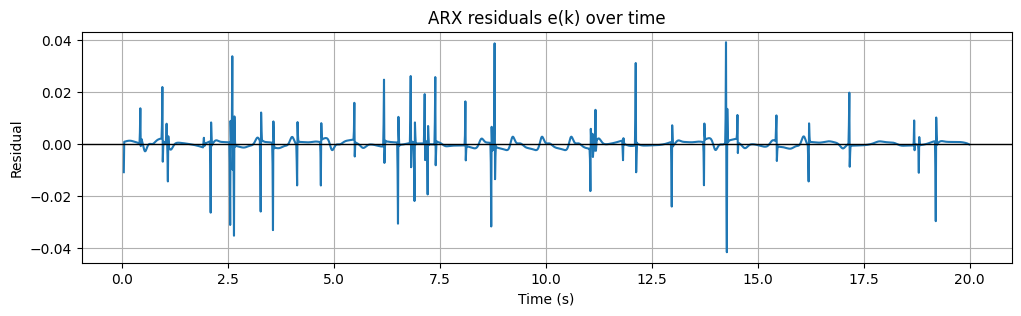

<Figure size 500x400 with 0 Axes>

Text(0.5, 0, 'Fitted y_hat(k)')

Text(0, 0.5, 'Residual e(k)')

Text(0.5, 1.0, 'Residuals vs fitted values')

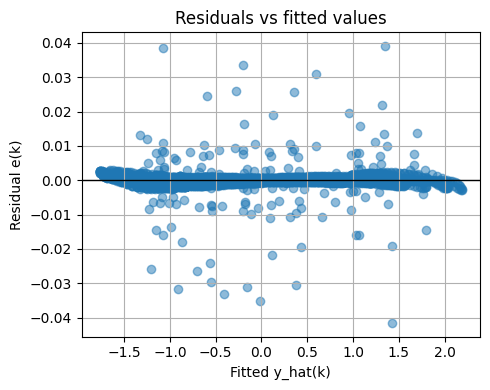


Ljung–Box test on residuals:
      lb_stat     lb_pvalue
10  76.202539  2.774225e-12
20  78.625187  6.710757e-09
40  93.836730  3.236339e-06


<Figure size 600x400 with 0 Axes>

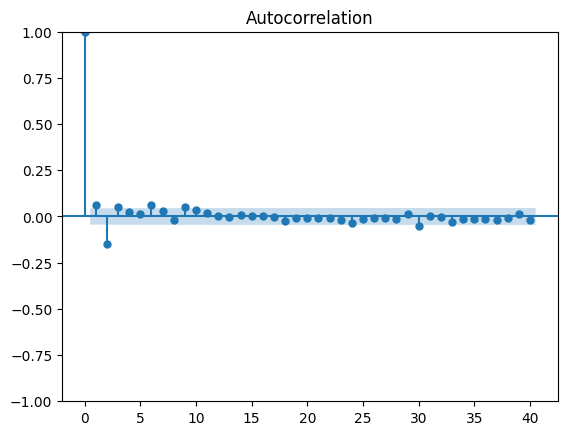

Text(0.5, 1.0, 'Residual ACF (ARX model)')

<Figure size 600x400 with 0 Axes>

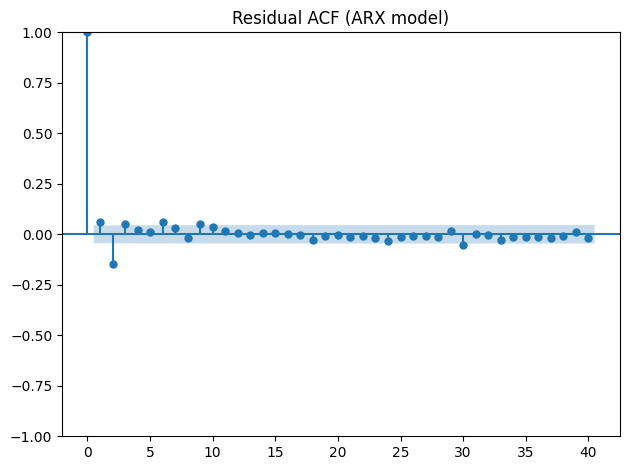

<Figure size 600x400 with 0 Axes>

Text(0.5, 0, 'Residual')

Text(0, 0.5, 'Density')

Text(0.5, 1.0, 'Residual histogram with normal fit')

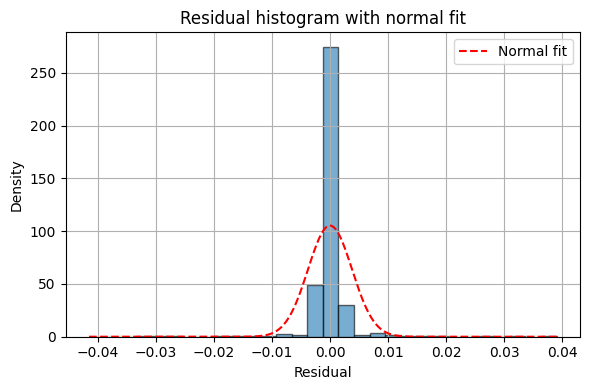

<Figure size 500x500 with 0 Axes>

((array([-3.39177449, -3.14067955, -3.00140324, ...,  3.00140324,
          3.14067955,  3.39177449], shape=(1996,)),
  array([-0.04152263, -0.03518917, -0.03303926, ...,  0.03365324,
          0.03860661,  0.03903889], shape=(1996,))),
 (np.float64(0.0026376045060301414),
  np.float64(-2.9270149773380035e-06),
  np.float64(0.6954535418546267)))

Text(0.5, 1.0, 'QQ-plot of residuals (ARX)')

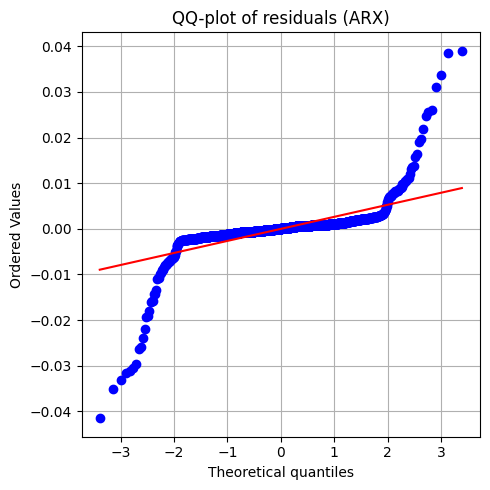

<Figure size 600x400 with 0 Axes>

TypeError: stem() got an unexpected keyword argument 'use_line_collection'

<Figure size 600x400 with 0 Axes>

In [24]:
# ==========================================
# ARX Residual Diagnostics & Validation
# ==========================================
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import ccf

# ------------------------------------------
# 0) Grab residuals, fitted, time, and input
# ------------------------------------------
eps   = best["eps"]          # residuals e(k) = y(k) - y_hat(k)
y_hat = best["y_hat"]        # fitted values on reg range
y_eff = best["y_reg"]        # true y on reg range
k0    = best["k0"]

t_eff = t[k0:]               # time indices aligned with residuals
u_eff = scaled["u"].values[k0:]  # input aligned with residuals

N_eff = len(eps)
print("Residual length:", N_eff)

# ==========================================
# (a) Residual properties
#    - zero mean
#    - constant variance
#    - lack of autocorrelation (Ljung-Box)
#    - normality (histogram + QQ-plot)
# ==========================================

# 1) Basic stats: mean and variance
res_mean = np.mean(eps)
res_var  = np.var(eps, ddof=1)
print(f"\nResidual mean  = {res_mean:.4e}")
print(f"Residual var   = {res_var:.4e}")

# 2) Residuals vs time
plt.figure(figsize=(12, 3))
plt.plot(t_eff, eps)
plt.axhline(0, color="k", linewidth=1)
plt.xlabel("Time (s)")
plt.ylabel("Residual")
plt.title("ARX residuals e(k) over time")
plt.grid(True)
plt.show()

# 3) Residuals vs fitted values (check for heteroscedasticity)
plt.figure(figsize=(5, 4))
plt.scatter(y_hat, eps, alpha=0.5)
plt.axhline(0, color="k", linewidth=1)
plt.xlabel("Fitted y_hat(k)")
plt.ylabel("Residual e(k)")
plt.title("Residuals vs fitted values")
plt.grid(True)
plt.tight_layout()
plt.show()

# 4) Ljung–Box test for lack of autocorrelation
lb = acorr_ljungbox(eps, lags=[10, 20, 40], return_df=True)
print("\nLjung–Box test on residuals:")
print(lb)

# Also plot ACF for visual check
plt.figure(figsize=(6, 4))
plot_acf(eps, lags=40)
plt.title("Residual ACF (ARX model)")
plt.tight_layout()
plt.show()

# 5) Normality: histogram + normal PDF overlay
plt.figure(figsize=(6, 4))
count, bins, _ = plt.hist(eps, bins=30, density=True, alpha=0.6, edgecolor="k")
mu_hat, sigma_hat = stats.norm.fit(eps)
x_grid = np.linspace(bins[0], bins[-1], 200)
plt.plot(x_grid, stats.norm.pdf(x_grid, mu_hat, sigma_hat), "r--", label="Normal fit")
plt.xlabel("Residual")
plt.ylabel("Density")
plt.title("Residual histogram with normal fit")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 6) Normality: QQ-plot
plt.figure(figsize=(5, 5))
stats.probplot(eps, dist="norm", plot=plt)
plt.title("QQ-plot of residuals (ARX)")
plt.grid(True)
plt.tight_layout()
plt.show()

# ==========================================
# (b) Cross-correlation with input
#    - Check for leftover dynamics
# ==========================================

# remove means before CCF
eps_z = eps - np.mean(eps)
u_z   = u_eff - np.mean(u_eff)

cc = ccf(eps_z, u_z)[:41]  # first 41 lags (0..40)
lags = np.arange(0, len(cc))

# 95% confidence bounds for zero correlation
conf = 1.96 / np.sqrt(N_eff)

plt.figure(figsize=(6, 4))
plt.stem(lags, cc, use_line_collection=True)
plt.axhline(0, color="k", linewidth=1)
plt.axhline(conf, color="r", linestyle="--")
plt.axhline(-conf, color="r", linestyle="--")
plt.xlabel("Lag")
plt.ylabel("CCF(e,u)")
plt.title("Cross-correlation between residuals and input u(k)")
plt.grid(True)
plt.tight_layout()
plt.show()

print("\nInterpretation hint:")
print("- If most CCF values lie within ±{:.3f}, there is little leftover dynamics\n"
      "  between input and residuals, and the ARX model is adequate."
      .format(conf))


Samples: 2000, Train: 1400, Test: 600

Linear features: ['-y(k-1)', '-y(k-2)', '-y(k-3)', '-y(k-4)', 'u(k-1)', 'u(k-2)', 'u(k-3)']
Nonlinear features added: ['[y(k-1)]^2', '[y(k-2)]^2', '[y(k-3)]^2', '[y(k-4)]^2', '[u(k-1)]^2', '[u(k-2)]^2', '[u(k-3)]^2', 'y(k-1)*u(k-1)']

=== Baseline ARX (linear lags only) ===
Train: MAE=0.0017, RMSE=0.0039, R^2=1.0000
Test : MAE=0.0013, RMSE=0.0034, R^2=1.0000

=== Extended ARX with nonlinear features ===
Train: MAE=0.0016, RMSE=0.0039, R^2=1.0000
Test : MAE=0.0013, RMSE=0.0035, R^2=1.0000


<Figure size 1200x400 with 0 Axes>

Text(0.5, 0, 'Time (s)')

Text(0, 0.5, 'Scaled dtheta')

Text(0.5, 1.0, 'Effect of nonlinear feature engineering on ARX performance')

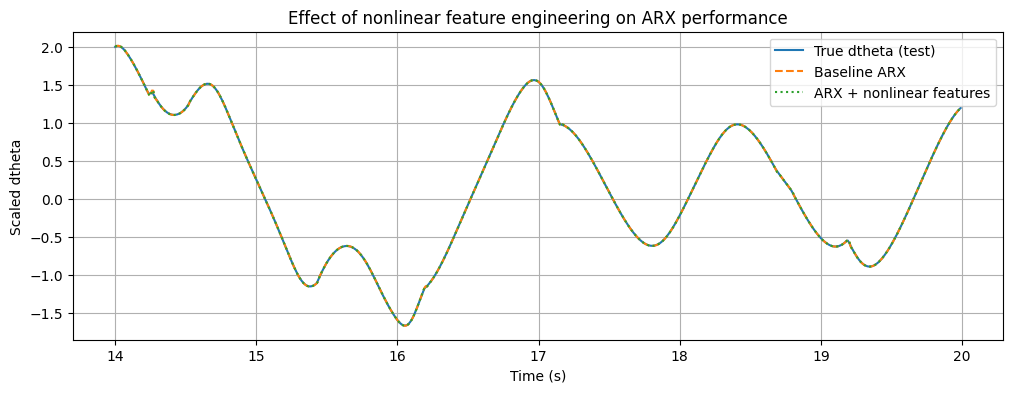

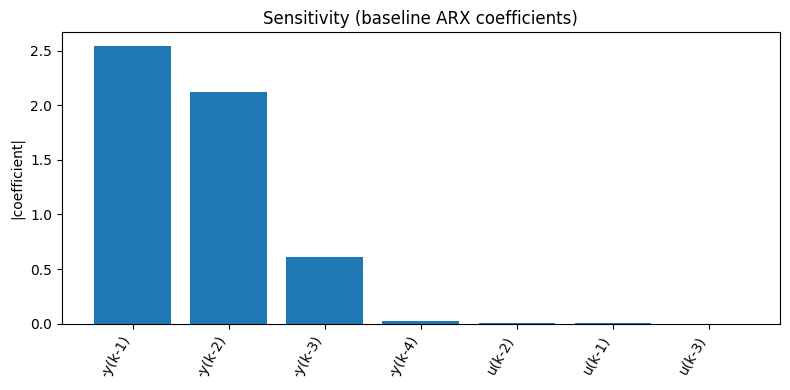

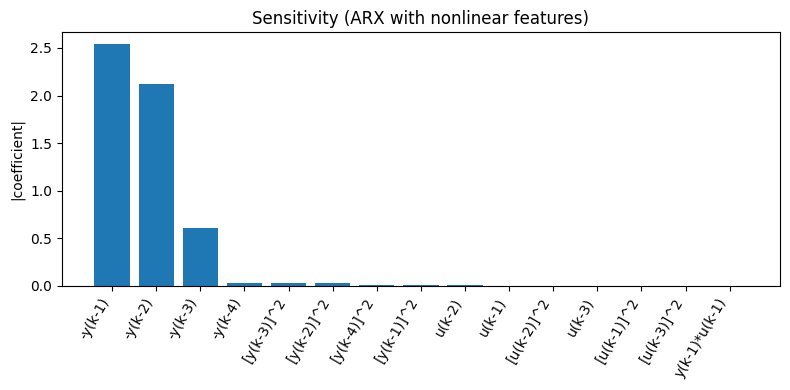


Top 5 dominant features (nonlinear ARX):
  -y(k-1)          theta = -2.5375
  -y(k-2)          theta =  2.1204
  -y(k-3)          theta = -0.6094
  -y(k-4)          theta =  0.0270
  [y(k-3)]^2       theta = -0.0267

Block diagram sketch (for LaTeX/TikZ):

r(k) ---> [ Controller ] ---> u(k) ---> [ Pendulum Process ] ---> y(k)=theta(k)
                   ^                                        |
                   |                                        v
                 [ ARX/NARX Model (predictor for y(k+1)) ]

Use this structure as a reference when drawing the figure in the report.


In [27]:
# ==========================================
# Feature Engineering & Control Insights (ARX)
# ==========================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# -------------------------------------------------
# 0) Data and basic settings
# -------------------------------------------------
y = scaled["dtheta"].values
u = scaled["u"].values
t = scaled["t"].values
na, nb, nk = na_best, nb_best, 1

N = len(y)
train_frac = 0.7
N_train = int(train_frac * N)

print(f"Samples: {N}, Train: {N_train}, Test: {N - N_train}")

# -------------------------------------------------
# 1) Helper: build FEATURE matrix with optional nonlinear terms
# -------------------------------------------------
def build_features(y, u, na, nb, nk=1, nonlinear=False):
    """
    Returns:
        X : [N_eff, n_features]
        y_reg : [N_eff,]
        k0 : first usable index
        feat_names : list of feature names
    """
    N = len(y)
    k0 = max(na, nb + nk - 1)
    rows = N - k0

    base_feats = []
    feat_names = []

    # base ARX features: -y(k-1..na), u(k-1..nb)
    for j in range(1, na + 1):
        feat_names.append(f"-y(k-{j})")
    for j in range(1, nb + 1):
        feat_names.append(f"u(k-{j})")

    n_base = len(feat_names)

    # if nonlinear, add squared and interaction terms
    if nonlinear:
        for j in range(1, na + 1):
            feat_names.append(f"[y(k-{j})]^2")
        for j in range(1, nb + 1):
            feat_names.append(f"[u(k-{j})]^2")
        # simple interaction between most recent output and input
        feat_names.append("y(k-1)*u(k-1)")

    X = np.zeros((rows, len(feat_names)))
    y_reg = np.zeros(rows)

    for i, k in enumerate(range(k0, N)):
        col = 0
        # base -y lags
        for j in range(1, na + 1):
            X[i, col] = -y[k - j]
            col += 1
        # base u lags
        for j in range(1, nb + 1):
            X[i, col] = u[k - nk - j + 1]
            col += 1

        if nonlinear:
            # squared y
            for j in range(1, na + 1):
                X[i, col] = (y[k - j])**2
                col += 1
            # squared u
            for j in range(1, nb + 1):
                X[i, col] = (u[k - nk - j + 1])**2
                col += 1
            # interaction y(k-1)*u(k-1)
            X[i, col] = y[k - 1] * u[k - 1]
            col += 1

        y_reg[i] = y[k]

    return X, y_reg, k0, feat_names

# -------------------------------------------------
# 2) Build baseline (linear ARX) and extended (nonlinear) feature sets
# -------------------------------------------------
X_lin, y_reg, k0, names_lin = build_features(y, u, na, nb, nk, nonlinear=False)
X_nl,  _,   _,  names_nl  = build_features(y, u, na, nb, nk, nonlinear=True)

t_eff = t[k0:]                   # aligned time
idx_eff = np.arange(k0, N)
train_mask = idx_eff < N_train
test_mask  = idx_eff >= N_train

def train_test_split_X(X):
    return X[train_mask, :], X[test_mask, :]

X_lin_tr, X_lin_te = train_test_split_X(X_lin)
X_nl_tr,  X_nl_te  = train_test_split_X(X_nl)
y_tr = y_reg[train_mask]
y_te = y_reg[test_mask]
t_tr = t_eff[train_mask]
t_te = t_eff[test_mask]

print("\nLinear features:", names_lin)
print("Nonlinear features added:", [n for n in names_nl if n not in names_lin])

# -------------------------------------------------
# 3) Fit linear models (ordinary least squares)
# -------------------------------------------------
def fit_linear(X_tr, y_tr):
    theta, *_ = np.linalg.lstsq(X_tr, y_tr, rcond=None)
    return theta

theta_lin = fit_linear(X_lin_tr, y_tr)
theta_nl  = fit_linear(X_nl_tr,  y_tr)

def eval_model(X_tr, y_tr, X_te, y_te, theta, label):
    y_tr_hat = X_tr @ theta
    y_te_hat = X_te @ theta

    def metrics(y_true, y_pred):
        mae  = mean_absolute_error(y_true, y_pred)
        rmse = np.sqrt(mean_squared_error(y_true, y_pred))
        r2   = r2_score(y_true, y_pred)
        return mae, rmse, r2

    mae_tr, rmse_tr, r2_tr = metrics(y_tr, y_tr_hat)
    mae_te, rmse_te, r2_te = metrics(y_te, y_te_hat)

    print(f"\n=== {label} ===")
    print(f"Train: MAE={mae_tr:.4f}, RMSE={rmse_tr:.4f}, R^2={r2_tr:.4f}")
    print(f"Test : MAE={mae_te:.4f}, RMSE={rmse_te:.4f}, R^2={r2_te:.4f}")
    return y_tr_hat, y_te_hat

y_lin_tr_hat, y_lin_te_hat = eval_model(
    X_lin_tr, y_tr, X_lin_te, y_te, theta_lin, "Baseline ARX (linear lags only)"
)
y_nl_tr_hat, y_nl_te_hat = eval_model(
    X_nl_tr, y_tr, X_nl_te, y_te, theta_nl, "Extended ARX with nonlinear features"
)

# -------------------------------------------------
# 4) Plot: linear vs nonlinear model on test set
# -------------------------------------------------
plt.figure(figsize=(12, 4))
plt.plot(t_te, y_te, label="True dtheta (test)")
plt.plot(t_te, y_lin_te_hat, "--", label="Baseline ARX")
plt.plot(t_te, y_nl_te_hat, ":", label="ARX + nonlinear features")
plt.xlabel("Time (s)")
plt.ylabel("Scaled dtheta")
plt.title("Effect of nonlinear feature engineering on ARX performance")
plt.grid(True)
plt.legend()
plt.show()

# -------------------------------------------------
# 5) Sensitivity analysis via standardized coefficients
#    (since scaled data ~ zero mean / unit variance,
#     |theta| gives relative importance of each feature)
# -------------------------------------------------
def plot_sensitivity(theta, feat_names, title):
    importance = np.abs(theta)
    order = np.argsort(-importance)  # descending
    plt.figure(figsize=(8, 4))
    plt.bar(np.arange(len(theta)), importance[order])
    plt.xticks(np.arange(len(theta)), [feat_names[i] for i in order],
               rotation=60, ha="right")
    plt.ylabel("|coefficient|")
    plt.title(title)
    plt.tight_layout()
    plt.show()

plot_sensitivity(theta_lin, names_lin,
                 "Sensitivity (baseline ARX coefficients)")
plot_sensitivity(theta_nl, names_nl,
                 "Sensitivity (ARX with nonlinear features)")

# quick print of top few dominant features in nonlinear model
order_nl = np.argsort(-np.abs(theta_nl))
print("\nTop 5 dominant features (nonlinear ARX):")
for i in order_nl[:5]:
    print(f"  {names_nl[i]:15s}  theta = {theta_nl[i]: .4f}")

# -------------------------------------------------
# 6) Block diagram hint (for report, not code)
# -------------------------------------------------
print("\nBlock diagram sketch (for LaTeX/TikZ):")
print("""
r(k) ---> [ Controller ] ---> u(k) ---> [ Pendulum Process ] ---> y(k)=theta(k)
                   ^                                        |
                   |                                        v
                 [ ARX/NARX Model (predictor for y(k+1)) ]
""")
print("Use this structure as a reference when drawing the figure in the report.")


Sample time dt = 0.0100 s

ARX parameters:
  a1 = -2.528461
  a2 = 2.115756
  a3 = -0.628909
  a4 = 0.042091
  b1 = 0.002234
  b2 = -0.002680
  b3 = 0.000480

Discrete-time transfer function (in z^-1):
  num = [ 0.          0.00223412 -0.00267954  0.00047971]
  den = [ 1.         -2.52846124  2.115756   -0.62890926  0.04209088]

State-space realization (discrete):
A =
 [[ 2.52846124 -2.115756    0.62890926 -0.04209088]
 [ 1.          0.          0.          0.        ]
 [ 0.          1.          0.          0.        ]
 [ 0.          0.          1.          0.        ]]
B =
 [[1.]
 [0.]
 [0.]
 [0.]]
C =
 [[ 0.          0.00223412 -0.00267954  0.00047971]]
D =
 [[0.]]

Poles of G(z):
  0.9836+0.0268j  |z|=0.9840
  0.9836-0.0268j  |z|=0.9840
  0.4684+0.0000j  |z|=0.4684
  0.0928+0.0000j  |z|=0.0928

Zeros of G(z):
  0.9803  |z|=0.9803
  0.2190  |z|=0.2190

Stability check:
  All poles inside unit circle? -> True


/Users/aiqizhang/Desktop/4F/CHE507/Assignment/A2/myenv/lib/python3.12/site-packages/scipy/signal/_ltisys.py:599: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  self.num, self.den = normalize(*system)


<Figure size 1000x400 with 0 Axes>

Text(0.5, 0, 'Time (s)')

Text(0, 0.5, 'Output')

Text(0.5, 1.0, 'Step response of ARX-based discrete-time model')

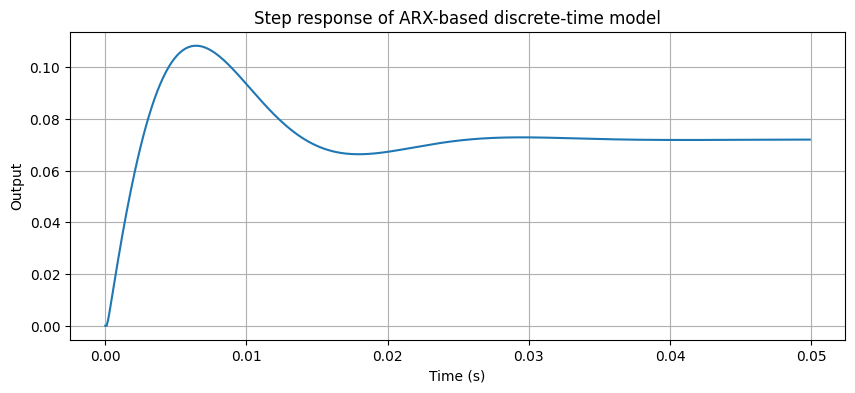

<Figure size 1000x400 with 0 Axes>

Text(0.5, 0, 'Time (s)')

Text(0, 0.5, 'Output')

Text(0.5, 1.0, 'Impulse response of ARX-based discrete-time model')

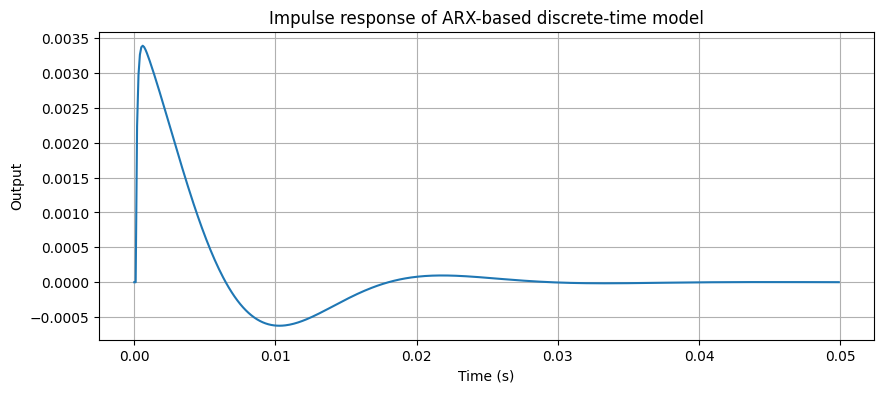


MPC-ready model (discrete):
  x(k+1) = A x(k) + B u(k)
  y(k)   = C x(k) + D u(k)
Use these A, B, C, D matrices when discussing
prediction horizons, constraints, and Q/R weights.


In [28]:
# ==========================================
# Control-Oriented Modeling for ARX(na, nb)
#  - Transfer function
#  - State-space model
#  - Poles / zeros / stability
#  - Step & impulse responses
# ==========================================
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# ----- 0) Grab ARX parameters (from your previous identification) -----
na = na_best         # AR order (e.g. 4)
nb = nb_best         # input order (e.g. 3)
theta = theta_hat    # estimated parameters: [a1..a_na, b1..b_nb]

# Output sampling time from t vector
dt = float(t[1] - t[0])
print(f"Sample time dt = {dt:.4f} s")

# ARX difference equation:
#   y(k) + a1*y(k-1) + ... + a_na*y(k-na)
#        = b1*u(k-1) + ... + b_nb*u(k-nb)
a_params = theta[:na]              # a1..a_na
b_params = theta[na:na+nb]         # b1..b_nb

print("\nARX parameters:")
for i, a_i in enumerate(a_params, start=1):
    print(f"  a{i} = {a_i:.6f}")
for j, b_j in enumerate(b_params, start=1):
    print(f"  b{j} = {b_j:.6f}")

# ==========================================
# a) Transfer function and state-space model
# ==========================================

# Denominator A(z^-1) = 1 + a1 z^-1 + ... + a_na z^-na
den = np.concatenate(([1.0], a_params))

# Numerator B(z^-1) = b1 z^-1 + ... + b_nb z^-nb
# -> leading 0 for the pure z^-1 delay
num = np.concatenate(([0.0], b_params))

print("\nDiscrete-time transfer function (in z^-1):")
print("  num =", num)
print("  den =", den)

# Create discrete-time LTI system (TF form)
sys_tf = signal.dlti(num, den, dt=dt)

# Convert to state-space
sys_ss = sys_tf.to_ss()
A, B, C, D = sys_ss.A, sys_ss.B, sys_ss.C, sys_ss.D

print("\nState-space realization (discrete):")
print("A =\n", A)
print("B =\n", B)
print("C =\n", C)
print("D =\n", D)

# ==========================================
# b) Poles, zeros, and stability
# ==========================================
poles = np.roots(den)
zeros = np.roots(num)  # includes z=0 from leading 0

print("\nPoles of G(z):")
for p in poles:
    print(f"  {p:.4f}  |z|={np.abs(p):.4f}")

print("\nZeros of G(z):")
for z0 in zeros:
    print(f"  {z0:.4f}  |z|={np.abs(z0):.4f}")

stable = np.all(np.abs(poles) < 1.0)
print("\nStability check:")
print("  All poles inside unit circle? ->", stable)

# ==========================================
# Dynamic response: step and impulse
# ==========================================
t_sim = np.arange(0, 5, dt)   # simulate 5 seconds, adjust if needed

# Step response
t_step, y_step = signal.dstep(sys_tf, n=len(t_sim))
y_step = np.squeeze(y_step)

# Impulse response
t_imp, y_imp = signal.dimpulse(sys_tf, n=len(t_sim))
y_imp = np.squeeze(y_imp)

plt.figure(figsize=(10, 4))
plt.plot(t_step * dt, y_step)
plt.xlabel("Time (s)")
plt.ylabel("Output")
plt.title("Step response of ARX-based discrete-time model")
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(t_imp * dt, y_imp)
plt.xlabel("Time (s)")
plt.ylabel("Output")
plt.title("Impulse response of ARX-based discrete-time model")
plt.grid(True)
plt.show()

# ==========================================
# MPC-ready matrices (for report discussion)
# ==========================================
print("\nMPC-ready model (discrete):")
print("  x(k+1) = A x(k) + B u(k)")
print("  y(k)   = C x(k) + D u(k)")
print("Use these A, B, C, D matrices when discussing")
print("prediction horizons, constraints, and Q/R weights.")


# NN

Supervised dataset shape: (1996, 7)
Train samples: 1397, Test samples: 599


,loss,'squared_error'
,hidden_layer_sizes,"(9, ...)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.0001
,power_t,0.5
,max_iter,2000
,shuffle,True



=== NN performance (NARX-style) ===
Train R^2  = 0.9865,  RMSE = 0.1195
Test  R^2  = 0.9833,  RMSE = 0.1183


<Figure size 1200x400 with 0 Axes>

Text(0.5, 0, 'Time (s)')

Text(0, 0.5, 'Scaled dtheta')

Text(0.5, 1.0, 'NN prediction vs. true dtheta')

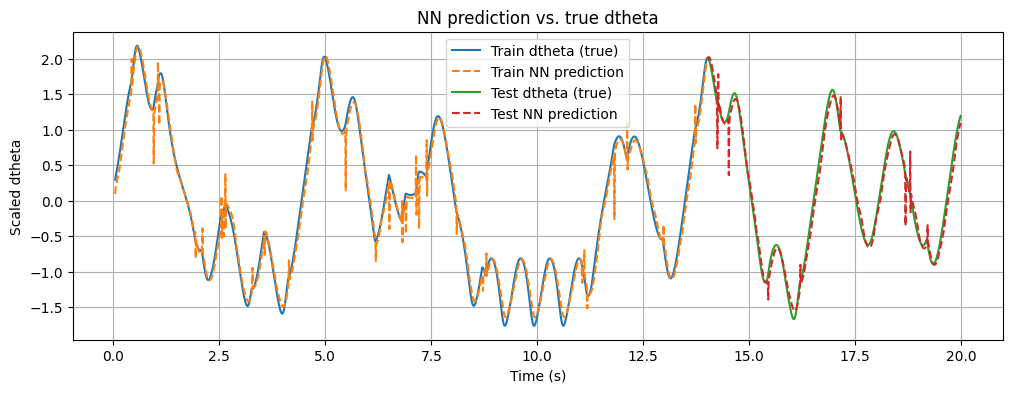

<Figure size 1200x300 with 0 Axes>

Text(0.5, 0, 'Time (s)')

Text(0, 0.5, 'Residual')

Text(0.5, 1.0, 'NN residuals on test set')

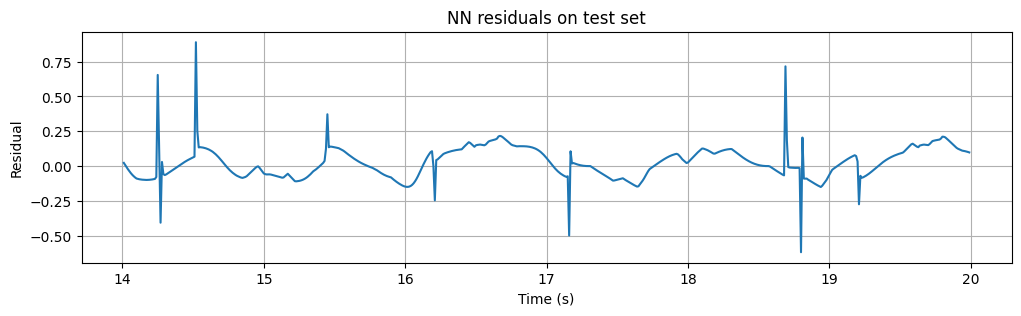

<Figure size 600x400 with 0 Axes>

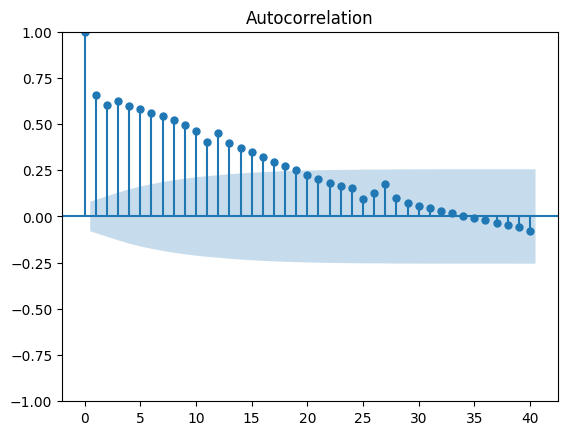

Text(0.5, 1.0, 'Residual ACF (NN model)')

<Figure size 600x400 with 0 Axes>

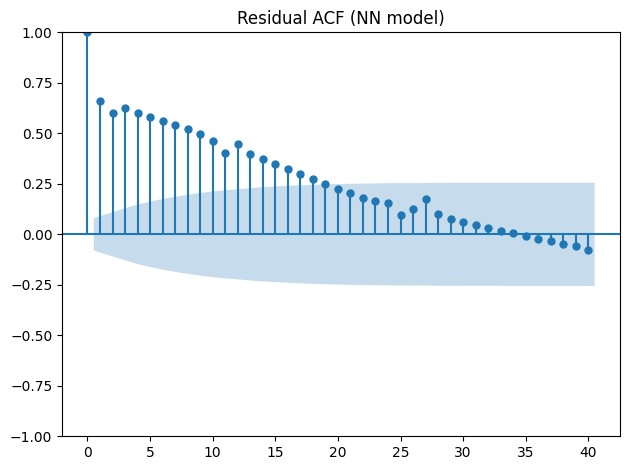

In [23]:
# ==========================================
# NARX-style Neural Network for dtheta
# ==========================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf

# We assume you already have `scaled` with columns:
# ["t", "dx", "dtheta", "xdot", "thetadot", "u"]

# ---------------------------------------------------
# 1) Build supervised dataset with lags (na=4, nb=3)
#    Inputs: dtheta(k-1..k-4), u(k-1..k-3)
#    Target: dtheta(k)
# ---------------------------------------------------
na = 4
nb = 3
nk = 1   # input delay (same as ARX)

y = scaled["dtheta"].values
u = scaled["u"].values
t = scaled["t"].values

N = len(y)
k0 = max(na, nb + nk - 1)
rows = N - k0

X_ml = []
y_ml = []
t_ml = []

for k in range(k0, N):
    # past dtheta
    feats = [y[k - j] for j in range(1, na + 1)]
    # past u
    feats += [u[k - nk - j + 1] for j in range(1, nb + 1)]
    X_ml.append(feats)
    y_ml.append(y[k])
    t_ml.append(t[k])

X_ml = np.array(X_ml)
y_ml = np.array(y_ml)
t_ml = np.array(t_ml)

print("Supervised dataset shape:", X_ml.shape)

# ---------------------------------------------------
# 2) Train / test split (respect time ordering)
# ---------------------------------------------------
train_frac = 0.7
N_eff = len(y_ml)
N_train = int(train_frac * N_eff)

X_train, X_test = X_ml[:N_train], X_ml[N_train:]
y_train, y_test = y_ml[:N_train], y_ml[N_train:]
t_train, t_test = t_ml[:N_train], t_ml[N_train:]

print(f"Train samples: {len(y_train)}, Test samples: {len(y_test)}")

# ---------------------------------------------------
# 3) Define and train MLPRegressor
# ---------------------------------------------------
nn = MLPRegressor(
    hidden_layer_sizes=(9, 16),
    activation="relu",
    solver="adam",
    learning_rate_init=1e-4,
    max_iter=2000,
    random_state=0,
)

nn.fit(X_train, y_train)

# ---------------------------------------------------
# 4) Predictions and metrics
# ---------------------------------------------------
y_train_pred = nn.predict(X_train)
y_test_pred = nn.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("\n=== NN performance (NARX-style) ===")
print(f"Train R^2  = {r2_train:.4f},  RMSE = {rmse_train:.4f}")
print(f"Test  R^2  = {r2_test:.4f},  RMSE = {rmse_test:.4f}")

# ---------------------------------------------------
# 5) Plot prediction vs actual (train + test)
# ---------------------------------------------------
plt.figure(figsize=(12, 4))
plt.plot(t_train, y_train, label="Train dtheta (true)")
plt.plot(t_train, y_train_pred, "--", label="Train NN prediction")
plt.plot(t_test, y_test, label="Test dtheta (true)")
plt.plot(t_test, y_test_pred, "--", label="Test NN prediction")
plt.xlabel("Time (s)")
plt.ylabel("Scaled dtheta")
plt.title("NN prediction vs. true dtheta")
plt.grid(True)
plt.legend()
plt.show()

# ---------------------------------------------------
# 6) Residuals and ACF (on test set)
# ---------------------------------------------------
res_test = y_test - y_test_pred

plt.figure(figsize=(12, 3))
plt.plot(t_test, res_test)
plt.xlabel("Time (s)")
plt.ylabel("Residual")
plt.title("NN residuals on test set")
plt.grid(True)
plt.show()

plt.figure(figsize=(6, 4))
plot_acf(res_test, lags=40)
plt.title("Residual ACF (NN model)")
plt.tight_layout()
plt.show()
